In [1]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import docx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols 

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

sns.set_palette("viridis")

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.022799
1    Abn_Barlow_05_Transgender_v2.docx -0.025626
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009465
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103
234  Spcl_Turnbull_06_Transgender.docx  0.00

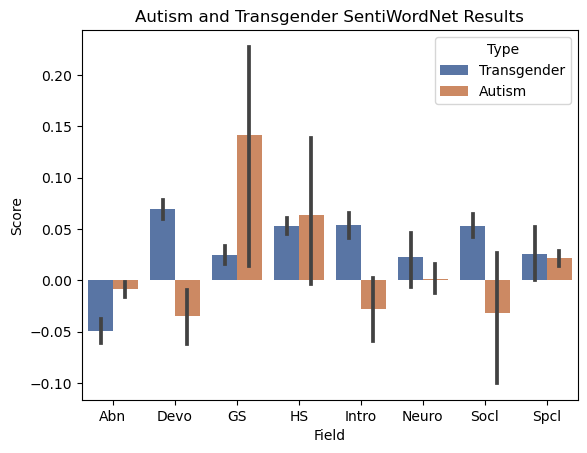

In [2]:
# SentiWords

# Getting the autism data frame

df_autism_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_autism.csv", low_memory=False)
df_autism_sentiwords = df_autism_sentiwords.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the transgender data frame

df_transgender_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_transgender.csv", low_memory=False)
df_transgender_sentiwords = df_transgender_sentiwords.sort_values("Textbook")

print(df_transgender_sentiwords)

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

df_autism_sentiwords_fields = pd.read_csv("field_df_sentiwords_autism.csv", low_memory=False)
df_transgender_sentiwords_fields = pd.read_csv("field_df_sentiwords_transgender.csv", low_memory=False)

ttest_sentiwords = stats.ttest_ind(df_autism_sentiwords_fields["Score"], df_transgender_sentiwords_fields["Score"], equal_var=False)
print("Overall: ", ttest_sentiwords) # autism vs transgender scores in general are significantly different

ttest_sentiwords_abn = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Abn']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Abn']["Score"], equal_var=False)
print("Abnormal: ", ttest_sentiwords_abn) 

ttest_sentiwords_devo = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Devo']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Devo']["Score"], equal_var=False)
print("Developmental: ", ttest_sentiwords_devo) 

ttest_sentiwords_gs = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'GS']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'GS']["Score"], equal_var=False)
print("Gender Studies: ", ttest_sentiwords_gs) 

ttest_sentiwords_hs = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'HS']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'HS']["Score"], equal_var=False)
print("Human Sexuality: ", ttest_sentiwords_hs) 

ttest_sentiwords_intro = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Intro']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Intro']["Score"], equal_var=False)
print("Introductory: ", ttest_sentiwords_intro) 

ttest_sentiwords_neuro = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Neuro']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Neuro']["Score"], equal_var=False)
print("Neuroscience: ", ttest_sentiwords_neuro) 

ttest_sentiwords_socl = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Socl']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Socl']["Score"], equal_var=False)
print("Social: ", ttest_sentiwords_socl) 

ttest_sentiwords_spcl = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Spcl']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Spcl']["Score"], equal_var=False)
print("Special Education: ", ttest_sentiwords_spcl) 

# Graph fields together

# Make new dataframe

# Combine textbooks

df_transgender_sentiwords_fields["Type"] = "Transgender"
df_autism_sentiwords_fields["Type"] = "Autism"

alphabetical_transgender_sentiwords = df_transgender_sentiwords_fields["Textbook"].str.split("_").values 
beginning_transgender_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_sentiwords.append(new_text_name)

df_transgender_sentiwords_fields["Common_Textbook"] = beginning_transgender_sentiwords

alphabetical_autism_sentiwords = df_autism_sentiwords_fields["Textbook"].str.split("_").values 
beginning_autism_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_sentiwords.append(new_text_name)

df_autism_sentiwords_fields["Common_Textbook"] = beginning_autism_sentiwords

# print(df_autism_sentiwords_fields)

combined_df_sentiwords = df_transgender_sentiwords_fields.merge(df_autism_sentiwords_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])

# print(combined_df_sentiwords)

fig, ax = plt.subplots()

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_sentiwords)

ax.set_title("Autism and Transgender SentiWordNet Results")

plt.savefig('fields_comparison_sentiwords.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx  0.282339
1    Abn_Barlow_05_Transgender_v2.docx -0.049555
2    Abn_Barlow_06_Transgender_v2.docx -0.045714
3    Abn_Barlow_07_Transgender_v2.docx -0.783257
4       Abn_Barlow_08_Transgender.docx -0.575150
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.699332
234  Spcl_Turnbull_06_Transgender.docx  0.29

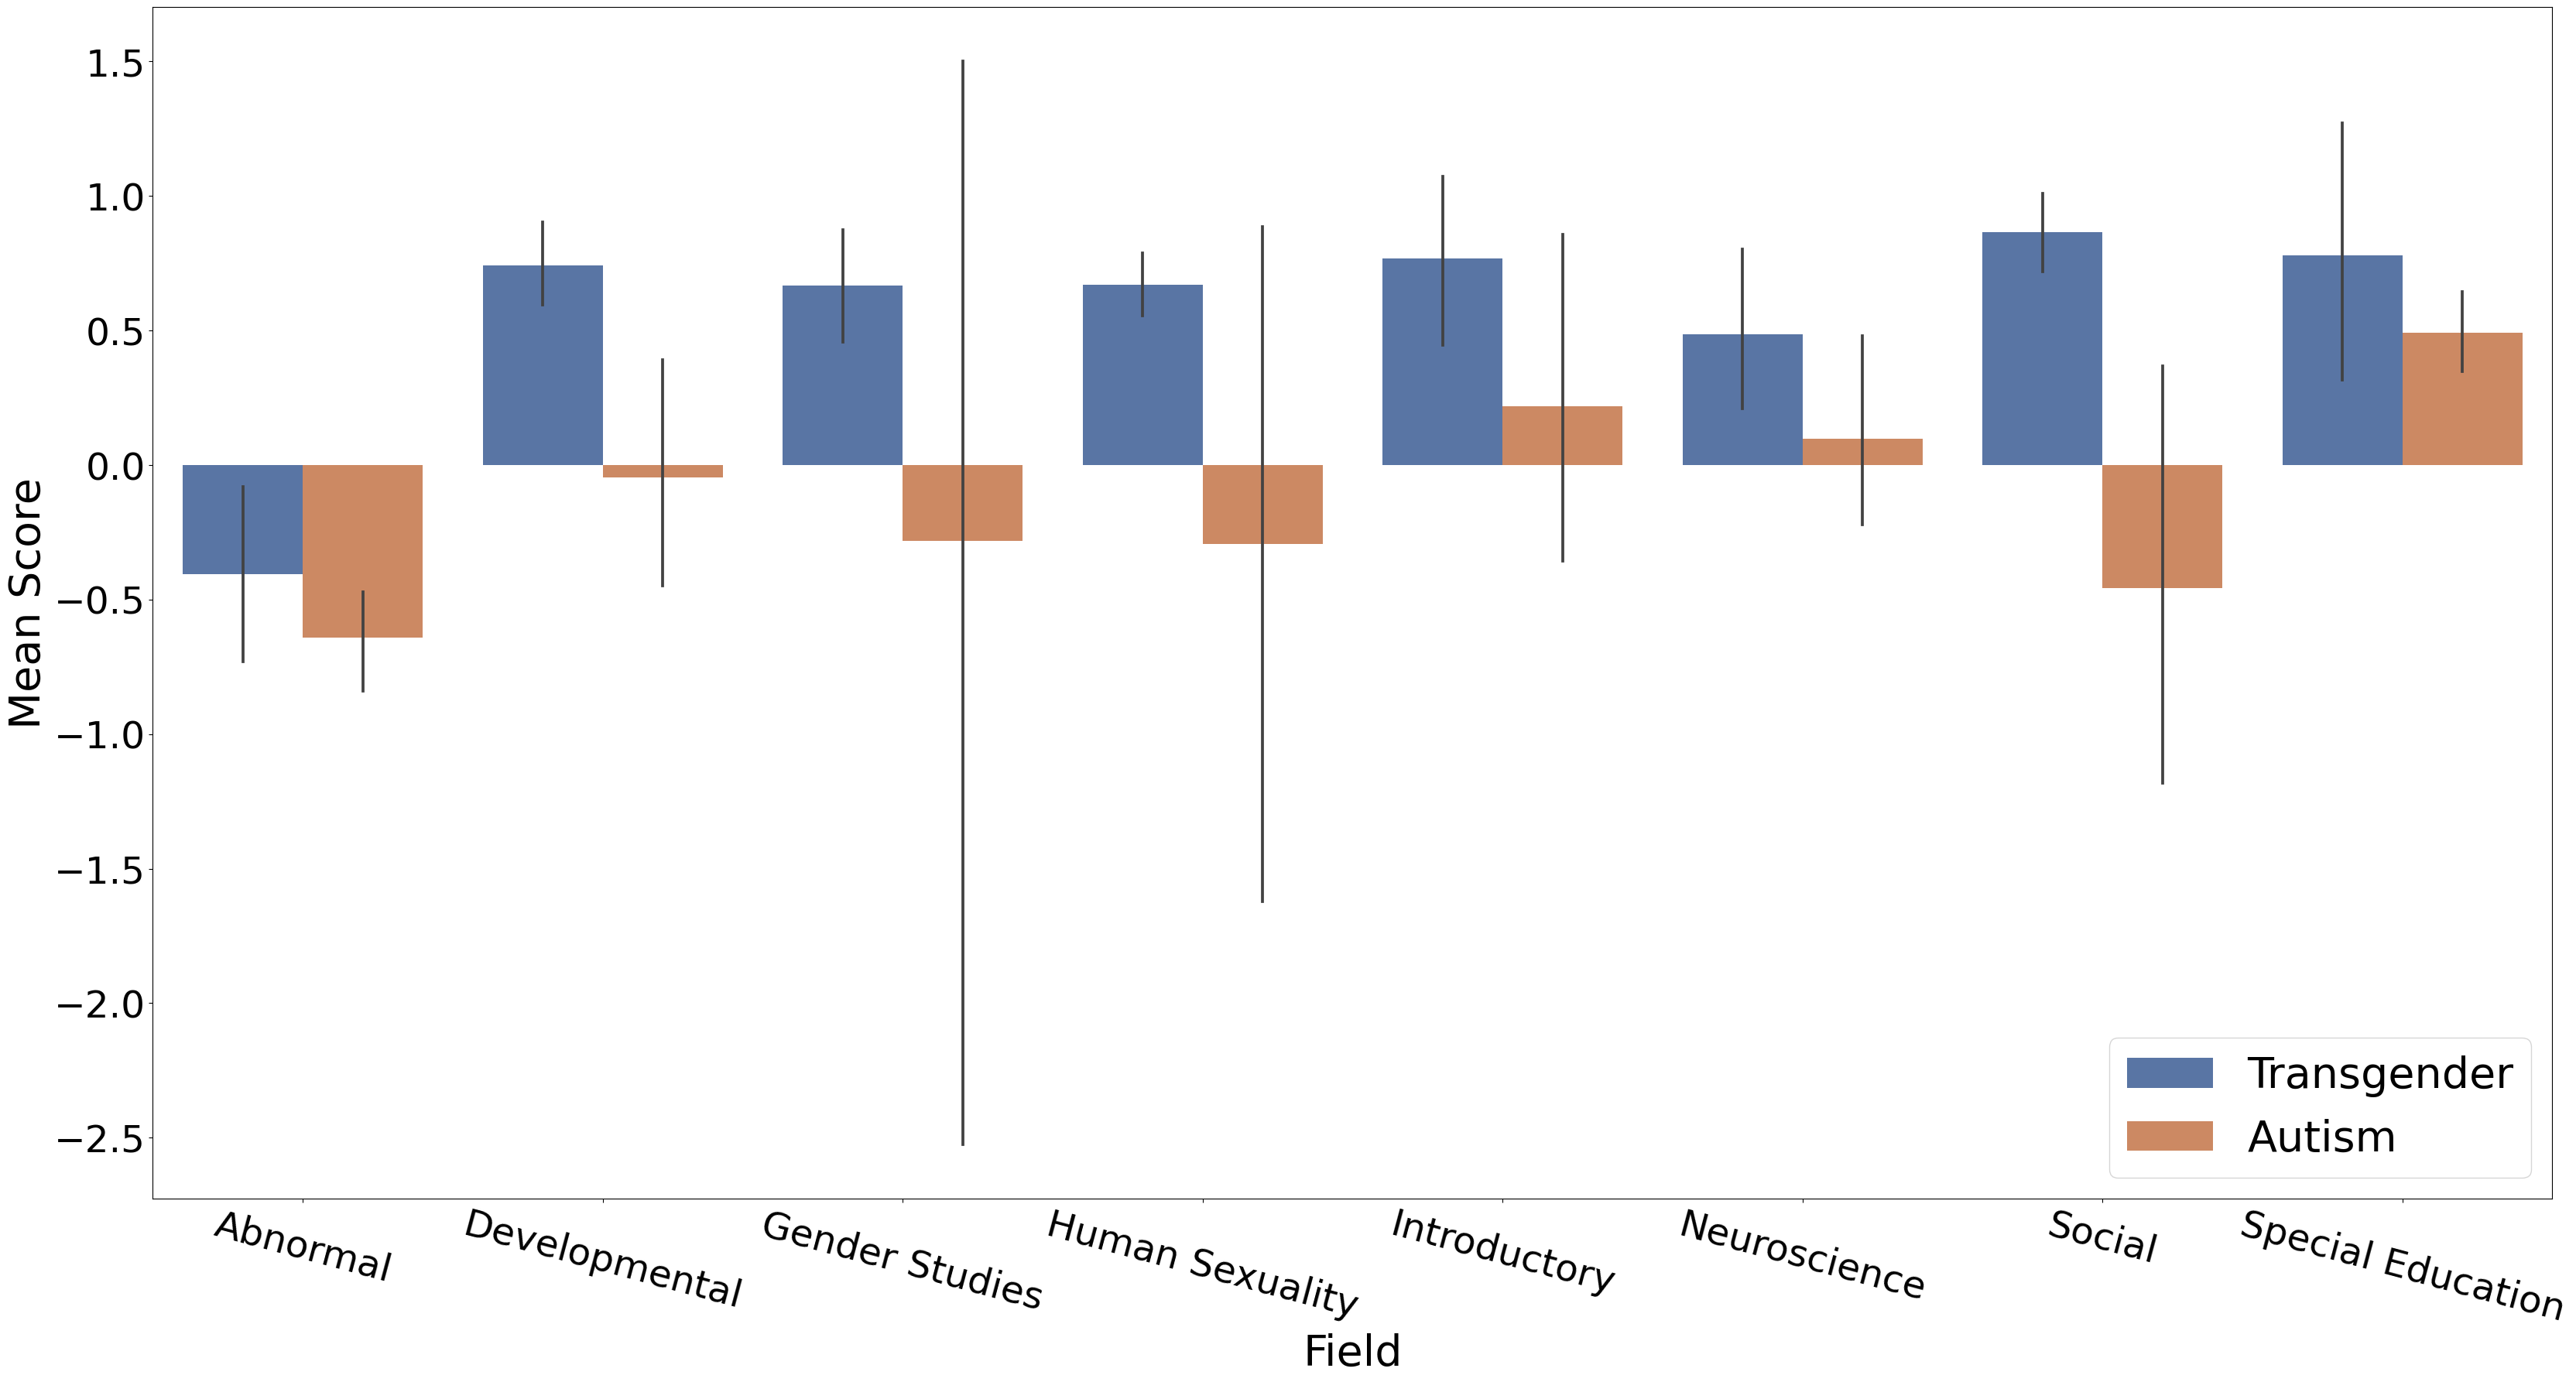

In [13]:
# ChatGPT

# Getting the autism data frame

df_autism_chatgpt = pd.read_csv("chatgpt_sentiments_autism_03_09_2024_official.csv", low_memory=False)
df_autism_chatpg = df_autism_chatgpt.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the transgender data frame

df_transgender_chatgpt = pd.read_csv("chatgpt_sentiments_transgender_03_13_2024_official.csv", low_memory=False)
df_transgender_chatgpt = df_transgender_chatgpt.sort_values("Textbook")

print(df_transgender_chatgpt)

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

df_autism_chatgpt_fields = pd.read_csv("field_df_autism_chatgpt.csv", low_memory=False)
df_transgender_chatgpt_fields = pd.read_csv("field_df_transgender_chatgpt.csv", low_memory=False)

ttest_sentiwords = stats.ttest_ind(df_autism_chatgpt_fields["Score"], df_transgender_chatgpt_fields["Score"], equal_var=False)
print("Overall: ", ttest_sentiwords) # autism vs transgender scores in general are significantly different

ttest_sentiwords_abn = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Abn']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Abn']["Score"], equal_var=False)
print("Abnormal: ", ttest_sentiwords_abn) 

ttest_sentiwords_devo = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Devo']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Devo']["Score"], equal_var=False)
print("Developmental: ", ttest_sentiwords_devo) 

ttest_sentiwords_gs = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'GS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'GS']["Score"], equal_var=False)
print("Gender Studies: ", ttest_sentiwords_gs) 

ttest_sentiwords_hs = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'HS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'HS']["Score"], equal_var=False)
print("Human Sexuality: ", ttest_sentiwords_hs) 

ttest_sentiwords_intro = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Intro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Intro']["Score"], equal_var=False)
print("Introductory: ", ttest_sentiwords_intro) 

ttest_sentiwords_neuro = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Neuro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Neuro']["Score"], equal_var=False)
print("Neuroscience: ", ttest_sentiwords_neuro) 

ttest_sentiwords_socl = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Socl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Socl']["Score"], equal_var=False)
print("Social: ", ttest_sentiwords_socl) 

ttest_sentiwords_spcl = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Spcl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Spcl']["Score"], equal_var=False)
print("Special Education: ", ttest_sentiwords_spcl) 

# Graph fields together

# Make new dataframe

# Combine textbooks

df_transgender_chatgpt_fields["Type"] = "Transgender"
df_autism_chatgpt_fields["Type"] = "Autism"

alphabetical_transgender_chatgpt = df_transgender_chatgpt_fields["Textbook"].str.split("_").values 
beginning_transgender_chatgpt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_chatgpt.append(new_text_name)

df_transgender_chatgpt_fields["Common_Textbook"] = beginning_transgender_chatgpt

alphabetical_autism_chatgpt = df_autism_chatgpt_fields["Textbook"].str.split("_").values 
beginning_autism_chatgpt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_chatgpt.append(new_text_name)

df_autism_chatgpt_fields["Common_Textbook"] = beginning_autism_chatgpt

# print(df_autism_sentiwords_fields)

combined_df_chatgpt = df_transgender_chatgpt_fields.merge(df_autism_chatgpt_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])

print(combined_df_chatgpt)
# print(combined_df_sentiwords)

fig, ax = plt.subplots(figsize=(40,20))

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_chatgpt)
plt.xlabel("Field", fontsize=40)
plt.ylabel("Mean Score", fontsize=40)
ax.legend(loc="lower right", fontsize=40)
plt.xticks(fontsize=35, rotation=-15)
ax.set_xticklabels(["Abnormal", "Developmental", "Gender Studies", "Human Sexuality", "Introductory", "Neuroscience", "Social", "Special Education"])
plt.yticks(fontsize=35)
# ax.set_title("Autism and Transgender ChatGPT Results")

plt.savefig('fields_comparison_chatgpt.png')

# comp = mc.MultiComparison(df_transgender_chatgpt_fields['Score'], df_autism_chatgpt_fields['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.d

group1,group2,meandiff,p-adj,lower,upper,reject
ChatGPT,Dictionary,0.2543,0.0004,0.099,0.4097,True
ChatGPT,SentiWordNet,0.0267,0.9139,-0.1286,0.1821,False
Dictionary,SentiWordNet,-0.2276,0.0018,-0.3829,-0.0723,True


     Unnamed: 0_x                    Textbook_x     Score Author_x Field  \
0             0.0  Abn_Barlow_04_Autism_v2.docx -0.016145   Barlow   Abn   
1             1.0  Abn_Barlow_05_Autism_v2.docx  0.002431   Barlow   Abn   
2             2.0  Abn_Barlow_06_Autism_v2.docx  0.004942   Barlow   Abn   
3             3.0     Abn_Barlow_07_Autism.docx  0.000952   Barlow   Abn   
4             4.0     Abn_Barlow_08_Autism.docx -0.022443   Barlow   Abn   
..            ...                           ...       ...      ...   ...   
649           NaN                           NaN  0.273949      NaN  Spcl   
650           NaN                           NaN  0.425315      NaN  Spcl   
651           NaN                           NaN  0.360749      NaN  Spcl   
652           NaN                           NaN  0.357132      NaN  Spcl   
653           NaN                           NaN  0.327171      NaN  Spcl   

           Method Common_Textbook  Unnamed: 0_y Textbook_y Author_y  \
0    SentiWordNe

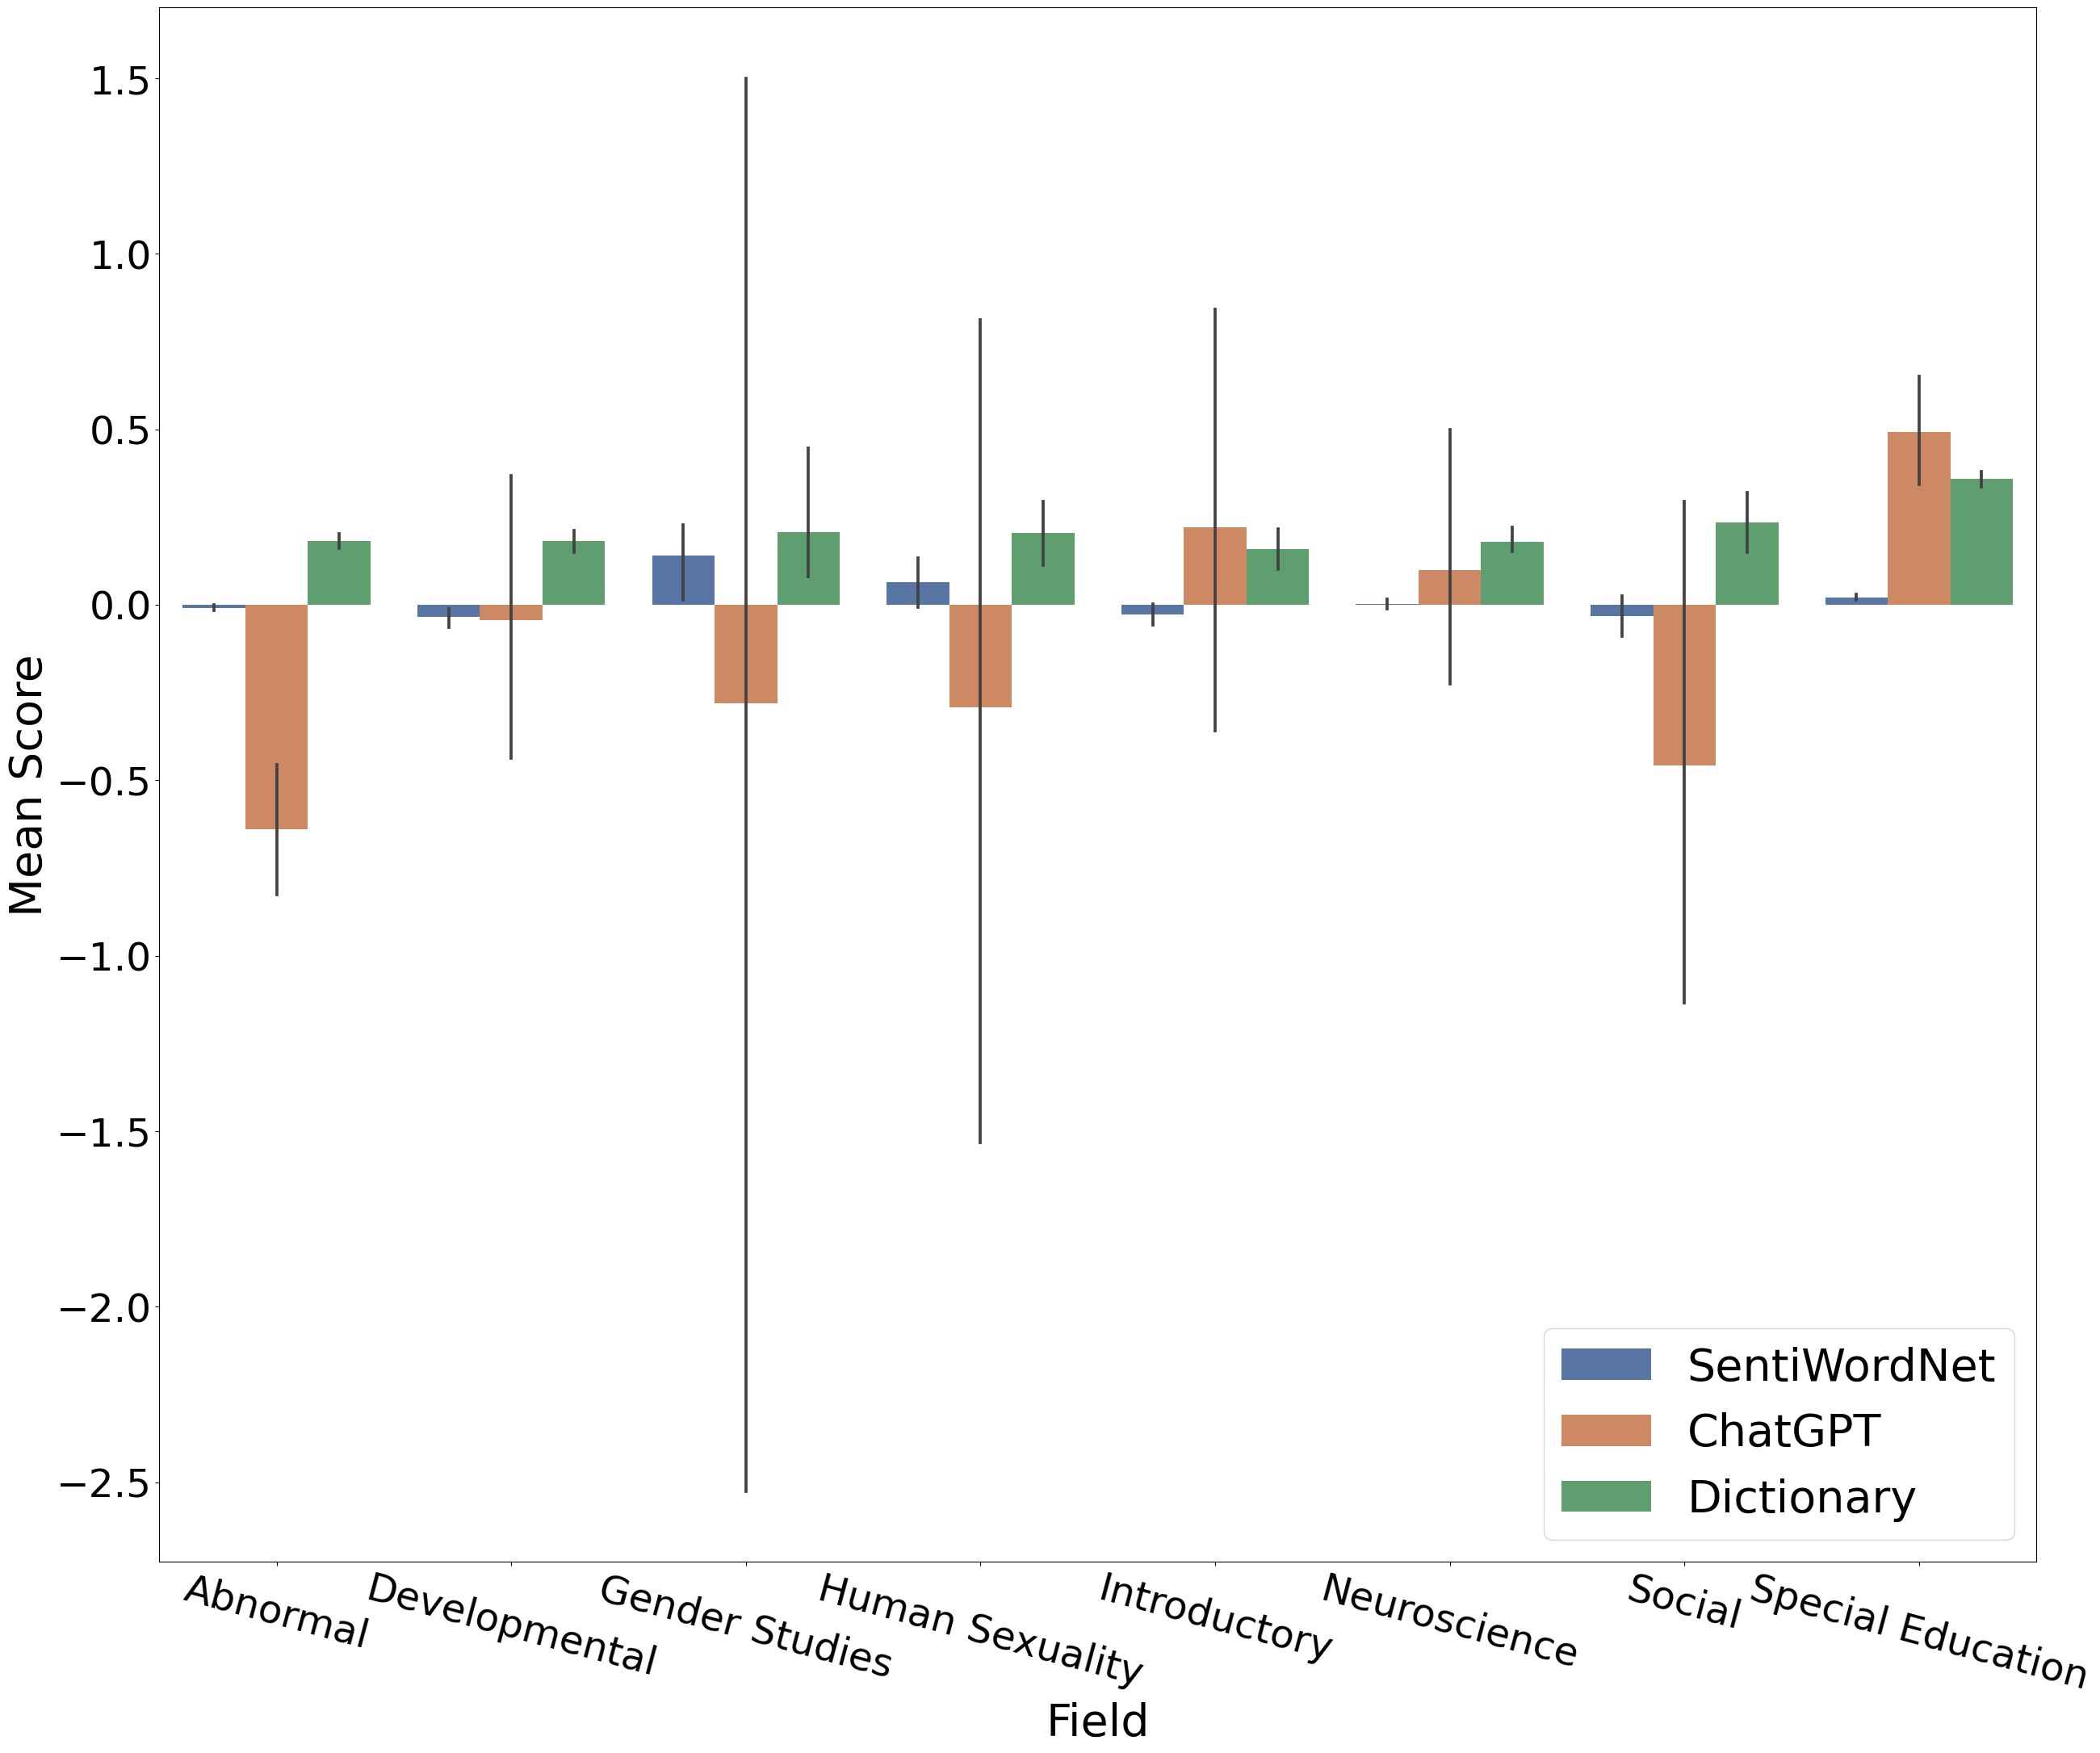

In [30]:
# Autism Only (Including VADER-like Dictionary)

# SentiWords

# Getting the sentiwords data frame

df_autism_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_autism.csv", low_memory=False)
df_autism_sentiwords = df_autism_sentiwords.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the chatgpt data frame

df_autism_chatgpt = pd.read_csv("chatgpt_sentiments_autism_03_09_2024_official.csv", low_memory=False)
df_autism_chatpg = df_autism_chatgpt.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the VADER-like data frame

df_autism = pd.read_csv("sentiments_3_19_2024_autism.csv", low_memory=False)
df_autism = df_autism.sort_values("Textbook")

print(df_autism)

df_autism_sentiwords_fields = pd.read_csv("field_df_sentiwords_autism.csv", low_memory=False)
df_autism_chatgpt_fields = pd.read_csv("field_df_autism_chatgpt.csv", low_memory=False)
df_autism = pd.read_csv("field_df_autism.csv", low_memory=False)

print("Mean SentiWordNet: ", df_autism_sentiwords["Score"].mean())
print("StDev SentiWordNet: ", np.std(df_autism_sentiwords["Score"]))


print("Mean ChatGPT: ", df_autism_chatgpt["Score"].mean())
print("StDev ChatGPT: ", np.std(df_autism_chatgpt["Score"]))


print("Mean VADER-like: ", df_autism["Score"].mean())
print("StDev VADER-like: ", np.std(df_autism["Score"]))


# Graph fields together

# Make new dataframe

# Combine textbooks

df_autism_chatgpt_fields["Method"] = "ChatGPT"
df_autism_sentiwords_fields["Method"] = "SentiWordNet"
df_autism["Method"] = "Dictionary"

alphabetical_autism_chatgpt = df_autism_chatgpt_fields["Textbook"].str.split("_").values 
beginning_autism_chatpgt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_chatpgt.append(new_text_name)

df_autism_chatgpt_fields["Common_Textbook"] = beginning_autism_chatgpt

alphabetical_autism_sentiwords = df_autism_sentiwords_fields["Textbook"].str.split("_").values 
beginning_autism_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_sentiwords.append(new_text_name)

df_autism_sentiwords_fields["Common_Textbook"] = beginning_autism_sentiwords

alphabetical_autism = df_autism["Textbook"].str.split("_").values 
beginning_autism = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism.append(new_text_name)

df_autism["Common_Textbook"] = beginning_autism

# print(df_autism_sentiwords_fields)

combined_df_autism_intermediate = df_autism_sentiwords_fields.merge(df_autism_chatgpt_fields, how='outer', on=['Common_Textbook', 'Field', "Method", "Score"])
combined_df_autism = combined_df_autism_intermediate.merge(df_autism, how="outer", on=['Common_Textbook', 'Field', "Method", "Score"])

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

anova = f_oneway(combined_df_autism[combined_df_autism['Method'] == 'ChatGPT']["Score"], combined_df_autism[combined_df_autism['Method'] == 'SentiWordNet']['Score'],
        combined_df_autism[combined_df_autism['Method'] == 'Dictionary']['Score'])

print(anova)

# Post-hoc testing

comp = mc.MultiComparison(combined_df_autism['Score'], combined_df_autism['Method'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

print(combined_df_autism)

fig, ax = plt.subplots(figsize=(30, 25))

sns.barplot(ax=ax, x="Field", y="Score", hue="Method", palette="deep", data=combined_df_autism)

# ax.set_title("Autism SentiWordNet, ChatGPT, and VADER-like Dictionary Results") #, fontsize=100)
plt.xlabel("Field", fontsize=40)
plt.ylabel("Mean Score", fontsize=40)
ax.legend(loc="lower right", fontsize=40)
plt.xticks(fontsize=35, rotation=-15)
ax.set_xticklabels(["Abnormal", "Developmental", "Gender Studies", "Human Sexuality", "Introductory", "Neuroscience", "Social", "Special Education"])
plt.yticks(fontsize=35)

plt.savefig('fields_comparison_autism.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

Overall:  TtestResult(statistic=-8.71291514040457, pvalue=5.032689482574602e-16, df=238.79180813768744)
Abnormal:  TtestResult(statistic=2.024082726130589, pvalue=0.050210470060738525, df=37.082889854940014)
Developmental:  TtestResult(statistic=-8.167898019025829, pvalue=5.351076304136395e-10, df=39.2938734590745)
Gender Studies:  TtestResult(statistic=-6.206587433924986, pvalue=1.4198114954148478e-06, df=26.118580049223507)
Human Sexuality:  TtestResult(statistic=-10.081218253064536, pvalue=2.4942496103017876e-09, df=20.201842627142014)
Introductory:  TtestResult(statistic=-4.494293675169754, pvalue=5.5803819201612715e-05, df=41.13052440171306)
Neuroscience:  TtestResult(statistic=-2.9503040326545698, pvalue=0.007325085712333743, df=22.3205585584479)
Social:  TtestResult(statistic=-10.399093253159572, pvalue=1.2717698184940063e-10, df=25.290822542370645)
Special Education:  TtestResult(statistic=-2.982236280978878, pvalue=0.007331960090848687, df=20.118462516529917)


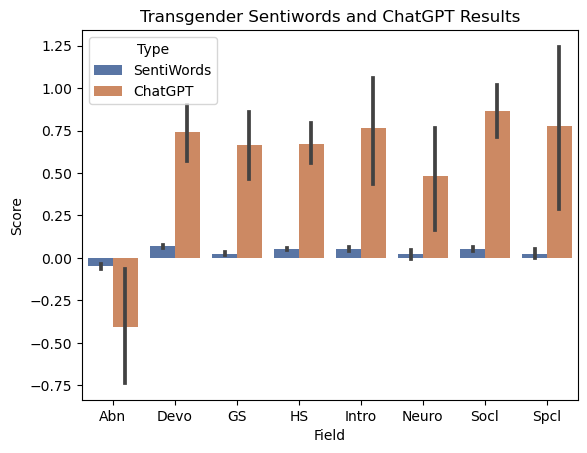

In [5]:
# Transgender Only

# Graph fields together

# Make new dataframe

# Combine textbooks

df_transgender_chatgpt_fields["Type"] = "ChatGPT"
df_transgender_sentiwords_fields["Type"] = "SentiWords"

alphabetical_transgender_chatgpt = df_transgender_chatgpt_fields["Textbook"].str.split("_").values 
beginning_transgender_chatpgt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_chatpgt.append(new_text_name)

df_transgender_chatgpt_fields["Common_Textbook"] = beginning_transgender_chatpgt

alphabetical_transgender_sentiwords = df_transgender_sentiwords_fields["Textbook"].str.split("_").values 
beginning_transgender_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_sentiwords.append(new_text_name)

df_transgender_sentiwords_fields["Common_Textbook"] = beginning_transgender_sentiwords

combined_df_transgender = df_transgender_sentiwords_fields.merge(df_transgender_chatgpt_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])


# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

# df_transgender_sentiwords_fields = pd.read_csv("field_df_transgender_sentiwords.csv", low_memory=False)
# df_transgender_chatgpt_fields = pd.read_csv("field_df_transgender_chatgpt.csv", low_memory=False)

ttest_transgender = stats.ttest_ind(df_transgender_sentiwords_fields["Score"], df_transgender_chatgpt_fields["Score"], equal_var=False)
print("Overall: ", ttest_transgender) 

ttest_transgender_abn = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Abn']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Abn']["Score"], equal_var=False)
print("Abnormal: ", ttest_transgender_abn) 

ttest_transgender_devo = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Devo']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Devo']["Score"], equal_var=False)
print("Developmental: ", ttest_transgender_devo) 

ttest_transgender_gs = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'GS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'GS']["Score"], equal_var=False)
print("Gender Studies: ", ttest_transgender_gs) 

ttest_transgender_hs = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'HS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'HS']["Score"], equal_var=False)
print("Human Sexuality: ", ttest_transgender_hs) 

ttest_transgender_intro = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Intro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Intro']["Score"], equal_var=False)
print("Introductory: ", ttest_transgender_intro) 

ttest_transgender_neuro = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Neuro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Neuro']["Score"], equal_var=False)
print("Neuroscience: ", ttest_transgender_neuro) 

ttest_transgender_socl = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Socl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Socl']["Score"], equal_var=False)
print("Social: ", ttest_transgender_socl) 

ttest_transgender_spcl = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Spcl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Spcl']["Score"], equal_var=False)
print("Special Education: ", ttest_transgender_spcl) 

fig, ax = plt.subplots()

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_transgender)

ax.set_title("Transgender Sentiwords and ChatGPT Results")

plt.savefig('fields_comparison_transgender.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

In [6]:
# Historical Data:

# Import dataframes

graphing_years_sentiwords_autism = pd.read_csv("graphing_years_sentiwords_autism.csv", low_memory=False)
graphing_years_chatgpt_autism = pd.read_csv("graphing_years_chatgpt_autism.csv", low_memory=False)
graphing_years_chatgpt_transgender = pd.read_csv("graphing_years_chatgpt_transgender.csv", low_memory=False)
graphing_years_dictionary_autism = pd.read_csv("graphing_years_dictionary_autism.csv", low_memory=False)
graphing_years_sentiwords_transgender = pd.read_csv("graphing_years_sentiwords_transgender.csv", low_memory=False)

print(graphing_years_sentiwords_transgender)

    Unnamed: 0  Year     Score
0         1988  1988 -0.047170
1         1997  1997  0.017638
2         1999  1999  0.035964
3         2000  2000  0.062334
4         2001  2001 -0.053646
5         2002  2002  0.071133
6         2003  2003  0.011267
7         2004  2004  0.017117
8         2005  2005  0.058522
9         2006  2006  0.018006
10        2007  2007  0.043371
11        2008  2008  0.036202
12        2009  2009  0.023335
13        2010  2010  0.029041
14        2011  2011  0.036757
15        2012  2012  0.030455
16        2013  2013  0.009680
17        2014  2014  0.016875
18        2015  2015  0.029388
19        2016  2016  0.044642
20        2017  2017  0.022166
21        2018  2018  0.039171


     Unnamed: 0_x    Year   Score_x  Unnamed: 0_y   Score_y Textbook_x  \
0          1988.0  1988.0 -0.047170        1988.0  0.041096        NaN   
1          1997.0  1997.0  0.017638        1997.0 -0.017366        NaN   
2          1999.0  1999.0  0.035964        1999.0 -0.077778        NaN   
3          2000.0  2000.0  0.062334        2000.0 -0.007775        NaN   
4          2001.0  2001.0 -0.053646        2001.0 -0.007326        NaN   
..            ...     ...       ...           ...       ...        ...   
477           NaN     NaN       NaN         213.0       NaN        NaN   
478           NaN     NaN       NaN         214.0       NaN        NaN   
479           NaN     NaN       NaN         215.0       NaN        NaN   
480           NaN     NaN       NaN         216.0       NaN        NaN   
481           NaN     NaN       NaN         217.0       NaN        NaN   

        Score Author_x Field    Type Common_Textbook  \
0         NaN      NaN   NaN     NaN             NaN   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Score_x   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.380
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.139
Time:                        16:35:25   Log-Likelihood:                 48.165
No. Observations:                  22   AIC:                            -92.33
Df Residuals:                      20   BIC:                            -90.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0226      0.006      3.606      0.002       0.010       0.036
Score_y       -0.3612      0.234     -1.543      0.139      -0.850       0.127
==============================================================================
Omnibus:                        9.009   Durbin-Watson:                   2.583
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.700
Skew:                          -1.074   Prob(JB):                       0.0351
Kurtosis:                       4.641   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

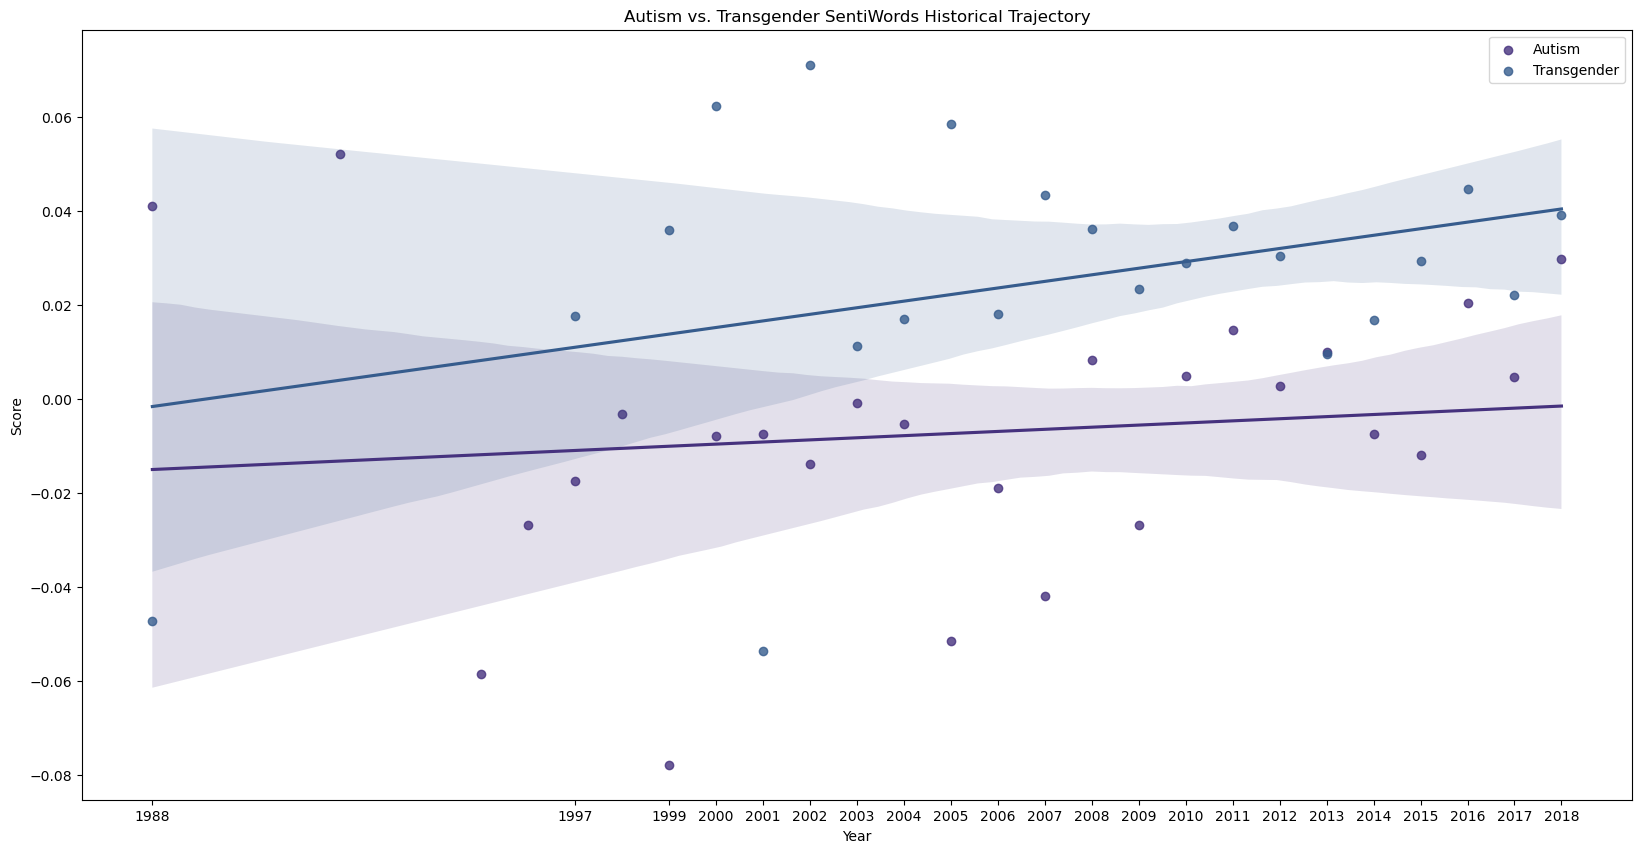

In [7]:
# Autism vs. Transgender SentiWords

# Combine dataframes

combined_df_sentiwords_years = graphing_years_sentiwords_transgender.merge(graphing_years_sentiwords_autism, how='outer', on=['Year'])
# print(combined_df_sentiwords_years) # Score_x = transgender, Score_y = autism

df_sentiwords = combined_df_sentiwords_years.merge(combined_df_sentiwords, how='outer')

print(df_sentiwords)

res = smf.ols(formula='Score_x ~ Score_y', data=combined_df_sentiwords_years).fit() # y ~ x
display(res.summary())
# res = smf.ols(formula='Score ~ Year', data=graphing_years_sentiwords_autism).fit() # y ~ x
# display(res.summary())

# ttest_transgender_years = stats.ttest_ind(graphing_years_sentiwords_autism["Score"], graphing_years_sentiwords_transgender["Score"], equal_var=False)
# print("T-Test: ", ttest_transgender) 

fig, ax = plt.subplots(figsize=(20, 10)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_sentiwords_autism, label="Autism")
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_sentiwords_transgender, label="Transgender")

ax.legend()
ax.set_xticks(graphing_years_sentiwords_transgender["Year"])
ax.set_title("Autism vs. Transgender SentiWords Historical Trajectory")
plt.savefig('years_comparison_sentiwords.png') # Not significantly different

    Unnamed: 0_x  Year   Score_x       Type_x  Unnamed: 0_y   Score_y  Type_y
0         1988.0  1988  0.637290  Transgender          1988 -1.867855  Autism
1         1997.0  1997  0.933866  Transgender          1997 -0.343447  Autism
2         1999.0  1999  0.354570  Transgender          1999 -1.108525  Autism
3         2000.0  2000  0.534619  Transgender          2000 -0.252563  Autism
4         2001.0  2001  0.783589  Transgender          2001 -0.508578  Autism
5         2002.0  2002  0.385299  Transgender          2002 -0.342893  Autism
6         2003.0  2003  0.236318  Transgender          2003 -0.089278  Autism
7         2004.0  2004  0.541201  Transgender          2004  0.243029  Autism
8         2005.0  2005  0.156394  Transgender          2005 -0.091470  Autism
9         2006.0  2006  0.195465  Transgender          2006 -0.510913  Autism
10        2007.0  2007  0.591467  Transgender          2007 -0.336079  Autism
11        2008.0  2008  0.341993  Transgender          2008 -0.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Score_x   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.1577
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.695
Time:                        16:53:30   Log-Likelihood:               -0.23712
No. Observations:                  22   AIC:                             4.474
Df Residuals:                      20   BIC:                             6.656
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4380     15.046     -0.361      0.722     -36.824      25.948
Year           0.0030      0.007      0.397      0.695      -0.013       0.019
==============================================================================
Omnibus:                        4.243   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                1.486
Skew:                          -0.064   Prob(JB):                        0.476
Kurtosis:                       1.733   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Score_y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     32.61
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           6.98e-06
Time:                        16:53:30   Log-Likelihood:                -15.195
No. Observations:                  26   AIC:                             34.39
Df Residuals:                      24   BIC:                             36.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.2804     22.233     -5.725      0.000    -173.166     -81.395
Year           0.0633      0.011      5.710      0.000       0.040       0.086
==============================================================================
Omnibus:                        5.020   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.147
Skew:                          -0.728   Prob(JB):                        0.207
Kurtosis:                       3.885   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

0     2.505145
1     1.277313
2     1.463095
3     0.787183
4     1.292167
5     0.728192
6     0.325597
7     0.298172
8     0.247864
9     0.706378
10    0.927546
11    0.532131
12    1.298074
13    0.250618
14    1.306333
15    0.561219
16    0.043629
17    0.272188
18    0.592226
19    0.583659
20    0.308025
21    0.073511
22         NaN
23         NaN
24         NaN
25         NaN
Name: Difference, dtype: float64
    Year         Type     Score
0   1988  Transgender  0.637290
1   1997  Transgender  0.933866
2   1999  Transgender  0.354570
3   2000  Transgender  0.534619
4   2001  Transgender  0.783589
5   2002  Transgender  0.385299
6   2003  Transgender  0.236318
7   2004  Transgender  0.541201
8   2005  Transgender  0.156394
9   2006  Transgender  0.195465
10  2007  Transgender  0.591467
11  2008  Transgender  0.341993
12  2009  Transgender  0.634334
13  2010  Transgender  0.310998
14  2011  Transgender  0.822650
15  2012  Transgender  0.737920
16  2013  Transgender  0.169495
1

C:\Users\maksi\AppData\Local\Temp\ipykernel_19980\1480055025.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_years.loc[:,"Year_Label"] = y1


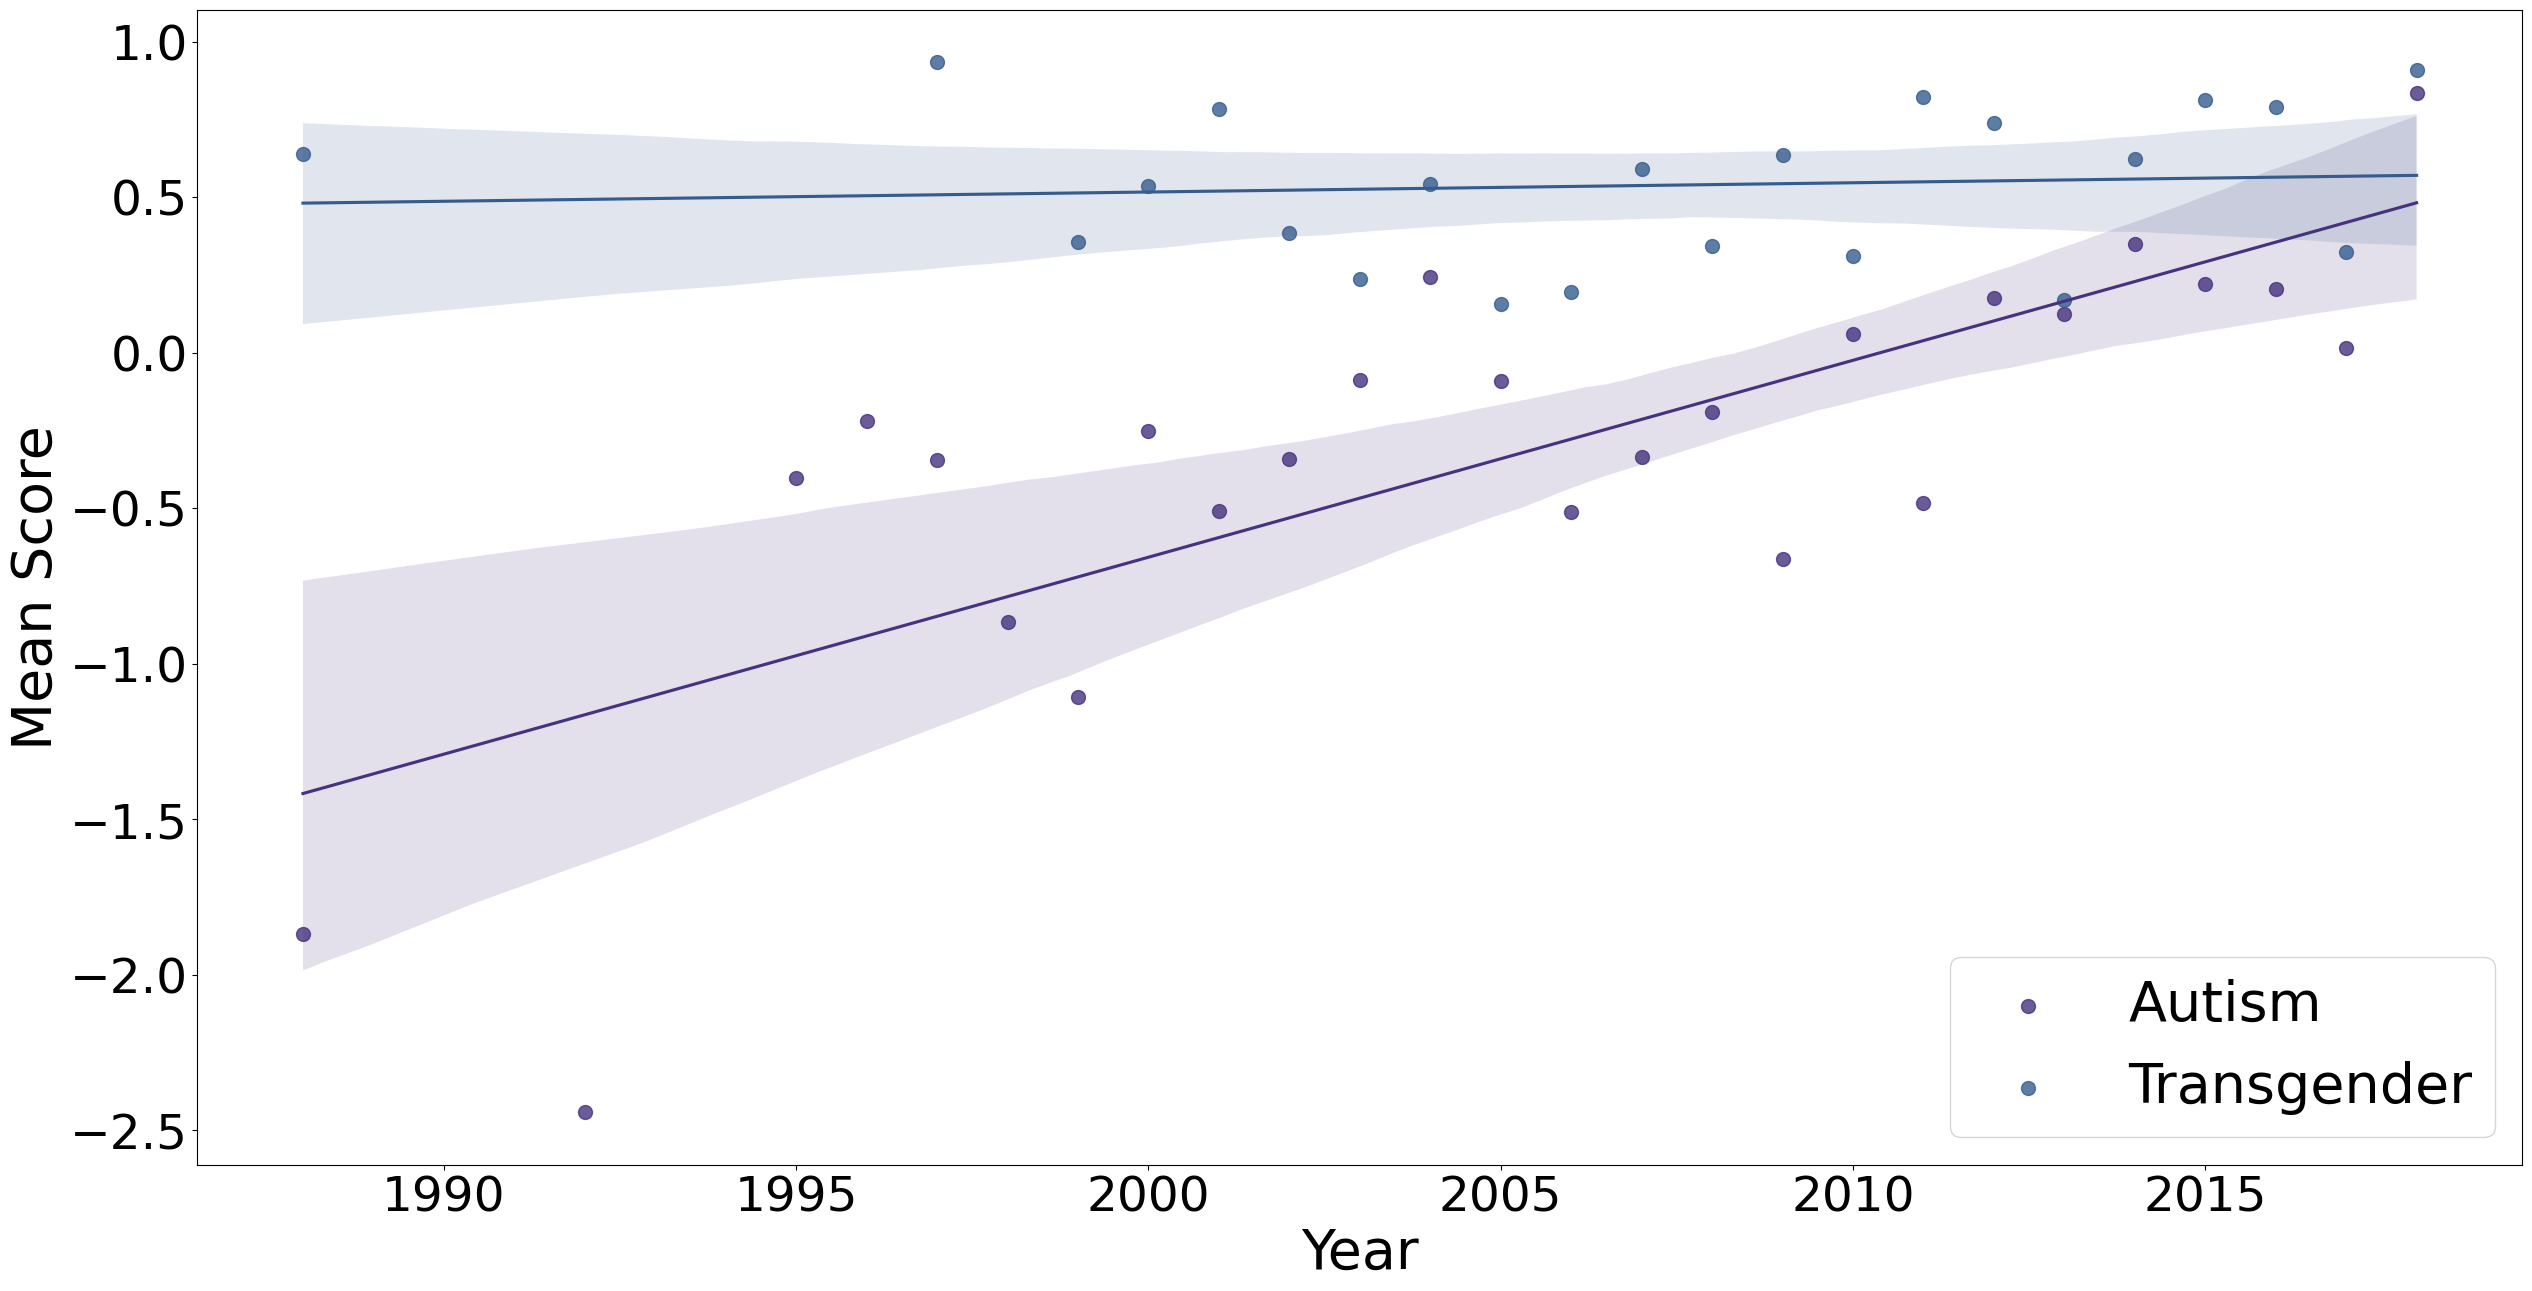

In [26]:
# Autism vs. Transgender ChatGPT

# Combine dataframes

combined_df_chatgpt_years = graphing_years_chatgpt_transgender.merge(graphing_years_chatgpt_autism, how='outer', on=['Year'])
print(combined_df_chatgpt_years) # Score_x = transgender, Score_y = autism

# print(combined_df_chatgpt)

res = smf.ols(formula='Score_x ~ Year', data=combined_df_chatgpt_years).fit() # y ~ x
display(res.summary())

res = smf.ols(formula='Score_y ~ Year', data=combined_df_chatgpt_years).fit() # y ~ x
display(res.summary())

combined_df_chatgpt_years["Difference"] = combined_df_chatgpt_years["Score_x"] - combined_df_chatgpt_years["Score_y"]

print(combined_df_chatgpt_years["Difference"])

# res = smf.ols(formula="Difference ~ Year", data=combined_df_chatgpt_years).fit() # y ~ x
# display(res.summary())

# result = sm.stats.anova_lm(res, type=2) 

# print(result)

# res = smf.ols(formula='Score ~ Year', data=graphing_years_sentiwords_autism).fit() # y ~ x
# display(res.summary())

graphing_years_chatgpt_transgender["Type"] = "Transgender"

graphing_years_chatgpt_autism["Type"] = "Autism"

combined_df_intermediate_years = graphing_years_chatgpt_transgender.merge(graphing_years_chatgpt_autism, how='outer', on=["Year", "Type", "Score"])
combined_df_years = combined_df_intermediate_years[["Year", "Type", "Score"]]

print(combined_df_years)

all_years = []
for i in range(min(combined_df_years["Year"]), max(combined_df_years["Year"]) + 2):
    all_years.append(i)
    
year_names = []
for i in all_years[0:len(all_years)-1]:
    year_names.append(str(i))
    
print(all_years)
the_years1 = combined_df_years["Year"].astype(str).unique()
print(the_years1)
print(len(the_years1))
y1 = pd.cut(combined_df_years['Year'], all_years, retbins=True, labels=year_names)[0]
print(y1)
combined_df_years.loc[:,"Year_Label"] = y1
print(combined_df_years)

combined_df_years.to_csv("years_transgender_autism_chatgpt.csv", encoding="utf-8")


# res = smf.ols(formula="Score ~ Year_Label * Type", data=combined_df_years).fit() # y ~ x
# display(res.summary())

# result = sm.stats.anova_lm(res, type=2) 

# print(result)

fig, ax = plt.subplots(figsize=(30, 15)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_chatgpt_autism, label="Autism", scatter_kws={'s':100})
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_chatgpt_transgender, label="Transgender", scatter_kws={'s':100})


ax.legend(loc="lower right", fontsize=40)
# ax.set_xticks(graphing_years_chatgpt_autism["Year"]) # has more years
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
# ax.set_title("Autism vs. Transgender ChatGPT Historical Trajectory", fontsize=80)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Mean Score", fontsize=40)
plt.savefig('years_comparison_chatgpt.png') 

    Year        Type     Score
0   1988  SentiWords  0.041096
1   1992  SentiWords  0.052124
2   1995  SentiWords -0.058537
3   1996  SentiWords -0.026727
4   1997  SentiWords -0.017366
..   ...         ...       ...
73  2014  Dictionary  0.217746
74  2015  Dictionary  0.185931
75  2016  Dictionary  0.281926
76  2017  Dictionary  0.184443
77  2018  Dictionary  0.246185

[78 rows x 3 columns]
['1988' '1992' '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002'
 '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '2018']
26
0     1988
1     1996
2     1999
3     1999
4     2000
      ... 
73    2015
74    2016
75    2017
76    2018
77    2018
Name: Year, Length: 78, dtype: category
Categories (26, object): ['1988' < '1992' < '1995' < '1996' ... '2015' < '2016' < '2017' < '2018']
    Year        Type     Score Year_Label
0   1988  SentiWords  0.041096       1988
1   1992  SentiWords  0.052124       1996
2   1995  SentiWords -0.058537

C:\Users\maksi\AppData\Local\Temp\ipykernel_19980\1866280882.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_autism_years["Year_Label"] = y


group1,group2,meandiff,p-adj,lower,upper,reject
ChatGPT,Dictionary,0.5352,0.0,0.2734,0.797,True
ChatGPT,SentiWords,0.3192,0.0128,0.0574,0.581,True
Dictionary,SentiWords,-0.216,0.1261,-0.4778,0.0458,False


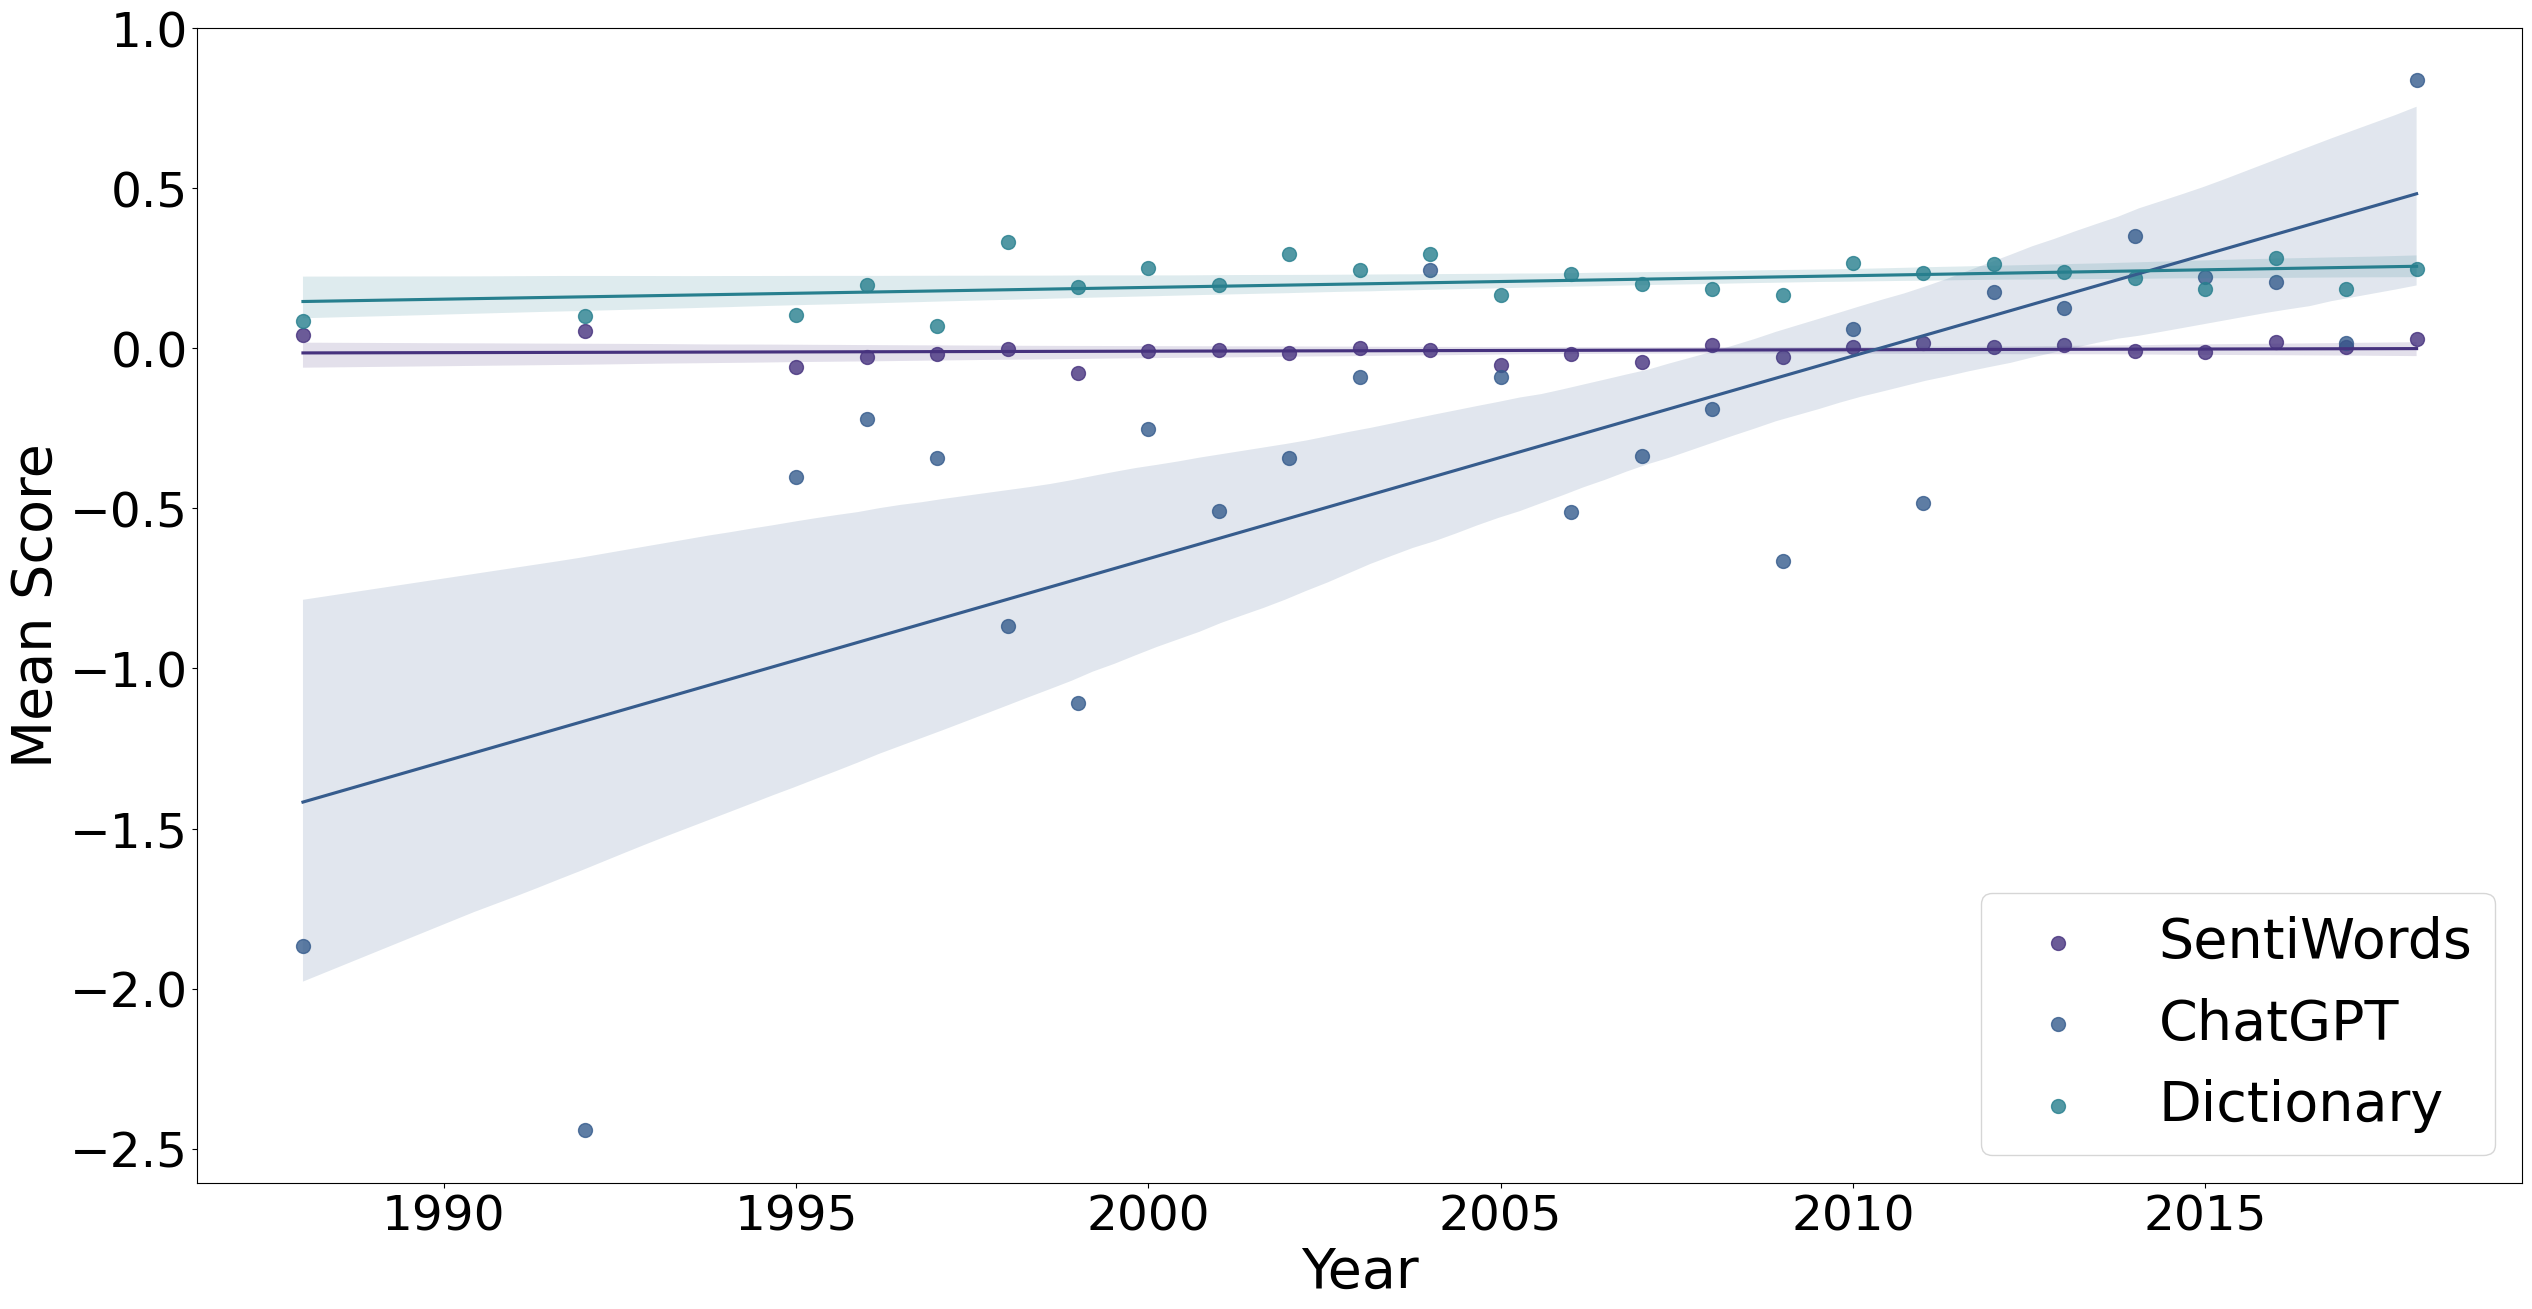

In [27]:
# Autism ChatGPT vs. SentiWords vs. VADER-like Dictionary

graphing_years_sentiwords_autism["Type"] = "SentiWords"

graphing_years_chatgpt_autism["Type"] = "ChatGPT"

graphing_years_dictionary_autism["Type"] = "Dictionary"

# print(graphing_years_sentiwords_autism)

combined_df_autism_intermediate_years = graphing_years_sentiwords_autism.merge(graphing_years_chatgpt_autism, how='outer', on=["Year", "Type", "Score"])
combined_df_autism_years1 = combined_df_autism_intermediate_years.merge(graphing_years_dictionary_autism, how="outer", on=["Year", "Type", "Score"])
combined_df_autism_years = combined_df_autism_years1[["Year", "Type", "Score"]]

print(combined_df_autism_years) # score_x = sentiwords, score_y = chatgpt, score = dictionary



# combined_df_autism_years['Year'] = combined_df_autism_years['Year'].astype(str)
the_years = combined_df_autism_years["Year"].astype(str).unique()
print(the_years)
print(len(the_years))
y = pd.cut(combined_df_autism_years['Year'], 26, retbins=True, labels=the_years)[0]
print(y)
combined_df_autism_years["Year_Label"] = y
print(combined_df_autism_years)

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

# anova = f_oneway(combined_df_autism_years[combined_df_autism_years['Type'] == 'ChatGPT']["Score"], 
#                  combined_df_autism_years[combined_df_autism_years['Type'] == 'SentiWords']['Score'],
#         combined_df_autism_years[combined_df_autism_years['Type'] == 'Dictionary']['Score'])

model = ols('Score ~ Type + Year_Label + Type:Year_Label', data=combined_df_autism_years).fit() 
result = sm.stats.anova_lm(model, type=2) 

print(result)

# Post-hoc testing

comp = mc.MultiComparison(combined_df_autism_years['Score'], combined_df_autism_years['Type'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

# Graphing

fig, ax = plt.subplots(figsize = (30, 15)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_sentiwords_autism, label="SentiWords", scatter_kws={'s':100})
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_chatgpt_autism, label="ChatGPT", scatter_kws={'s':100})
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_dictionary_autism, label="Dictionary", scatter_kws={'s':100})

# ax.legend()
# ax.set_xticks(graphing_years_chatgpt_autism["Year"]) # has more years
ax.legend(loc="lower right", fontsize=40)
# ax.set_xticks(graphing_years_chatgpt_autism["Year"]) # has more years
plt.xticks(fontsize=35)#, rotation=-30)
plt.yticks(fontsize=35)
# ax.set_title("Autism vs. Transgender ChatGPT Historical Trajectory", fontsize=80)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Mean Score", fontsize=40)
# ax.set_title("Autism SentiWords, ChatGPT, and VADER-Like Dictionary Historical Trajectories")
plt.savefig('years_comparison_autism.png') # All significantly different, except Dictionary vs. SentiWords?

In [ ]:
# Transgender ChatGPT vs. SentiWords

# Combine dataframes

combined_df_transgender_years = graphing_years_chatgpt_transgender.merge(graphing_years_sentiwords_transgender, how='outer', on=['Year'])
# print(combined_df_sentiwords_years) # Score_x = chatgpt, Score_y = sentiwords

res = smf.ols(formula='Score_x ~ Score_y', data=combined_df_transgender_years).fit() # y ~ x
display(res.summary())
# res = smf.ols(formula='Score ~ Year', data=graphing_years_sentiwords_autism).fit() # y ~ x
# display(res.summary())

fig, ax = plt.subplots(figsize=(20, 10)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_sentiwords_transgender, label="SentiWords")
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_chatgpt_transgender, label="ChatGPT")

ax.legend()
ax.set_xticks(graphing_years_chatgpt_transgender["Year"])
ax.set_title("Transgender ChatGPT vs. SentiWords Historical Trajectory")
plt.savefig('years_comparison_transgender.png') # Not significantly different